# UBER TRIP ANALYSIS¶

#### Description : Build a model which will predict the fare price from a given pick-up point to the agreed drop-off location.¶

In order to build this project, we have to perform the following tasks:

1. Pre-process the dataset
2. Identify the outliers
3. Check the correlation
4. Implement the linear regression and random forest regression models
5. Evaluate the model and compare their respective scores like R2, RMSE etc.

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

#### Importing the Dataset

In [2]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


## Preprocess the Dataset

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.shape

(200000, 9)

In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [10]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [14]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

#### Finding & Handling Null Values

In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [16]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [17]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
df.isnull().sum().sum()

0

In [20]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [21]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'], errors='coerce', utc=True)

In [22]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [23]:
x=df['fare_amount'].value_counts()
x

fare_amount
6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: count, Length: 1244, dtype: int64

In [24]:
print(type(x))
print('max count=', x[6.50])
x

<class 'pandas.core.series.Series'>
max count= 9684


fare_amount
6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: count, Length: 1244, dtype: int64

In [25]:
df.drop(['pickup_datetime'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


## Checking Outliers & Filling them

<Axes: >

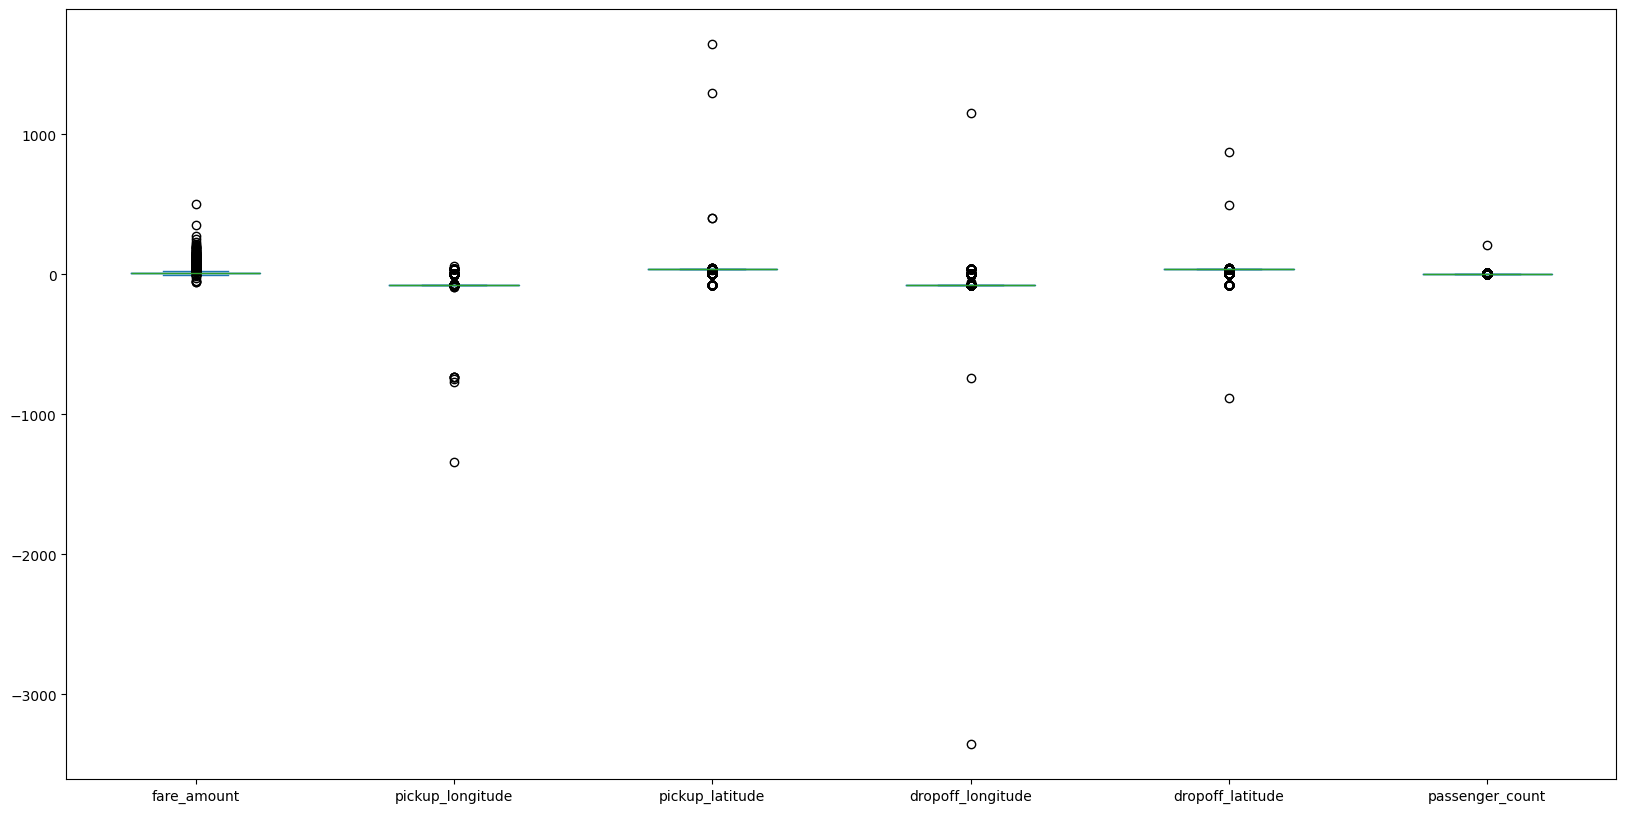

In [26]:
df.plot(kind='box', subplots=False, layout=(7,2), figsize=(20,10))

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

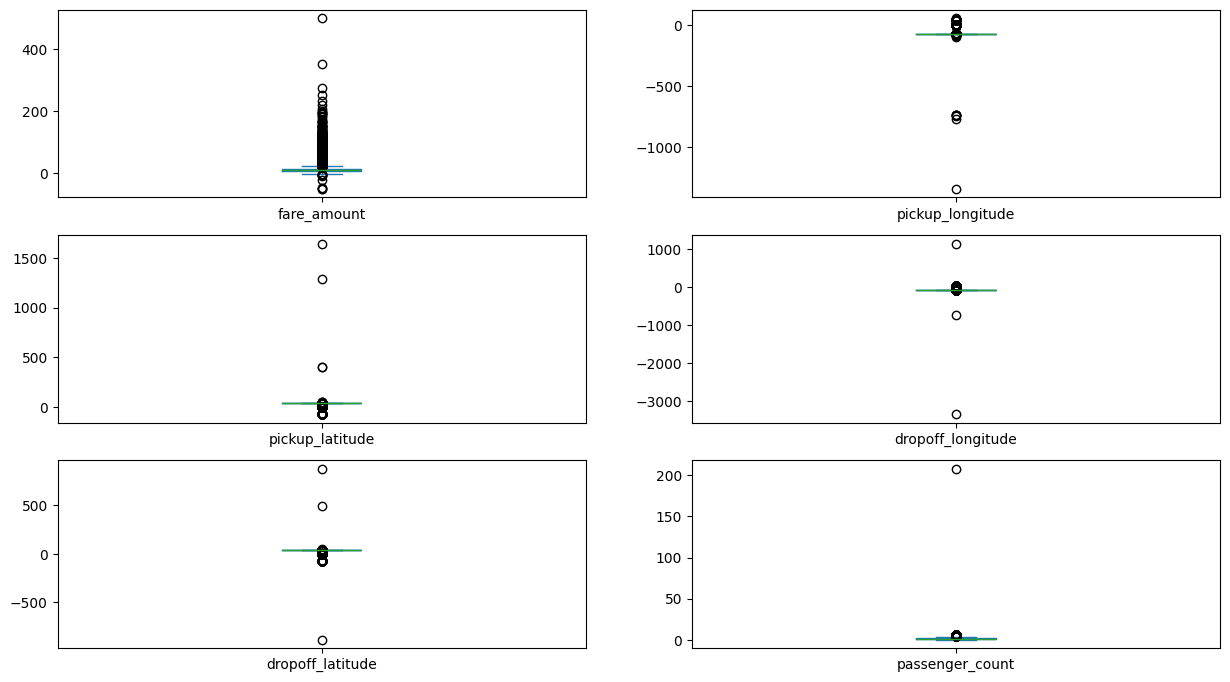

In [27]:
df.plot(kind='box', subplots=True, layout= (7,2), figsize=(15,20)) #7rows 2columns

In [28]:
#Clip function
l=np.arange(10,100,10)
l1 = np.clip(l,30,60)
l1

array([30, 30, 30, 40, 50, 60, 60, 60, 60])

In [29]:
#removing outliers

def remove_outliers(df1, col):
    Q1=df1[col].quantile(0.25)
    Q2=df1[col].quantile(0.50)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    print('________________________________________________________________')
    print('col=',col,'Q1=',Q1,'Q2=',Q2,'Q3=',Q3)
    df1[col]=np.clip(df1[col], lower_bound, upper_bound)
    return df1

def treat_outliers(df1, col_list):
    print('col_list=',col_list)
    for c in col_list:
        df1 = remove_outliers(df1, c)
    return df1

In [30]:
df = treat_outliers(df, df.columns)

col_list= Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
________________________________________________________________
col= fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5
________________________________________________________________
col= pickup_longitude Q1= -73.992065 Q2= -73.98182299999999 Q3= -73.96715350000001
________________________________________________________________
col= pickup_latitude Q1= 40.73479575 Q2= 40.752592 Q3= 40.767158
________________________________________________________________
col= dropoff_longitude Q1= -73.991407 Q2= -73.98009300000001 Q3= -73.963658
________________________________________________________________
col= dropoff_latitude Q1= 40.733823 Q2= 40.753042 Q3= 40.76800113909912
________________________________________________________________
col= passenger_count Q1= 1.0 Q2= 1.0 Q3= 2.0


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

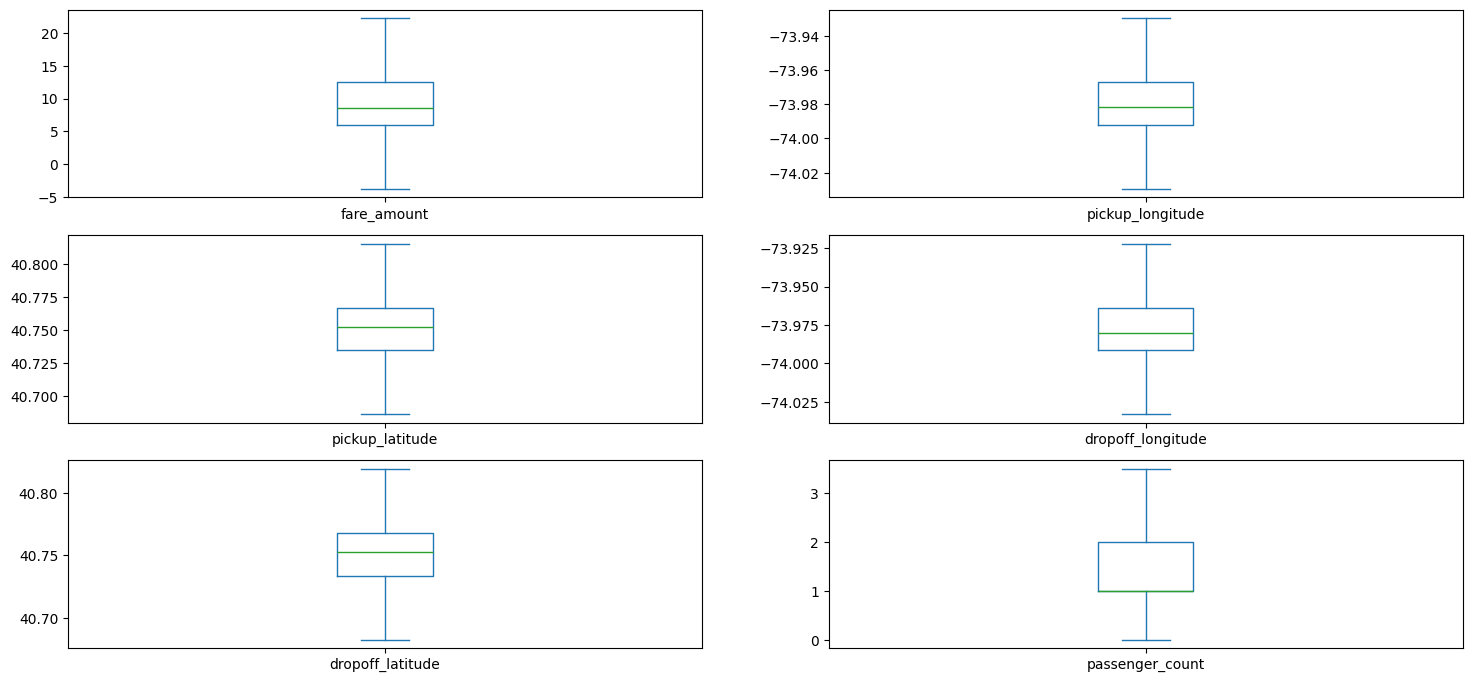

In [31]:
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(18,20))

In [32]:
#finding incorrect coordinates.(latitude(>90 and <-90) , longitude(>180 andd <-180))
incorrect_coordinates = df.loc[(df['pickup_latitude']>90) | (df['pickup_latitude']<-90) |
                                (df['pickup_longitude']>180) | (df['pickup_longitude']<-180) |
                                (df['dropoff_latitude']>90) | (df['dropoff_latitude']<-90) |
                                (df['dropoff_longitude']>180) | (df['dropoff_longitude']<-180)]

incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [33]:
df.drop(incorrect_coordinates, inplace=True, errors='ignore')
#if there is any row present.

In [34]:
#Calculate the distance between two points, using haversine formula.
#We can't use Eucladian as it is for flat surface..

In [35]:
!pip install haversine


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import haversine as hs
travel_dist = []
for i in range(len(df['pickup_longitude'])):
    long1, lat1, long2, lat2 = [df['pickup_longitude'][i], df['pickup_latitude'][i], df['dropoff_longitude'][i], df['dropoff_latitude'][i]]
    loc1=(lat1, long1)
    loc2=(lat2, long2)
    c=hs.haversine(loc1,loc2)
    travel_dist.append(c)

#print(travel_dist)
df['Distance_Travelled'] = travel_dist

In [37]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_Travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,4.116088


In [38]:
df = df[(df['Distance_Travelled']>=1) & (df['Distance_Travelled']<=130)]
df.shape

(163040, 7)

In [39]:
bool_df = df.isnull()
bool_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_Travelled
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199994,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


## Identify the Correlation

<Axes: >

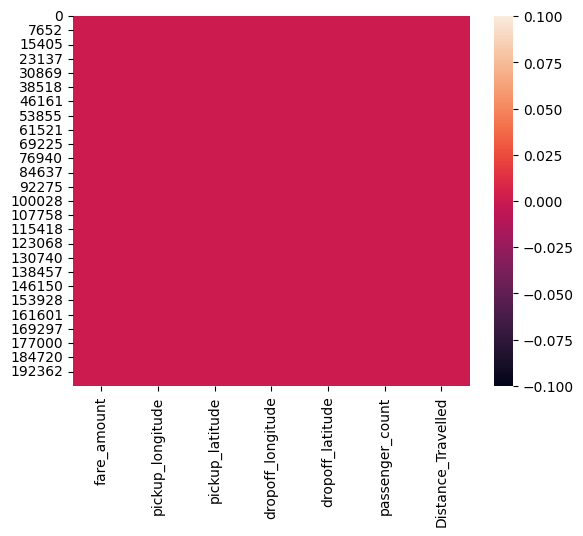

In [40]:
sns.heatmap(bool_df) #r=0, no correlation

C:\Users\akank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\akank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

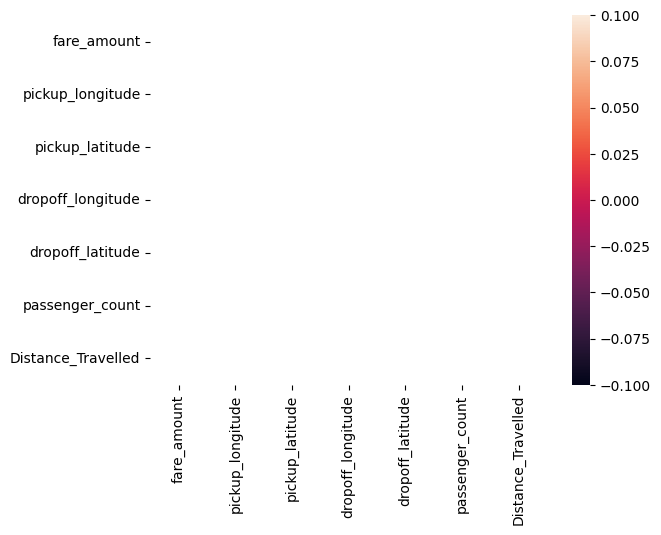

In [41]:
sns.heatmap(bool_df.corr())   #r=1, coz everything is false, same value, perfectly correlated with each other.

In [42]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_Travelled
fare_amount,1.000000,0.193177,-0.119469,0.258616,-0.137745,0.015056,0.798927
pickup_longitude,0.193177,1.000000,0.425309,0.241587,0.169203,-0.012892,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148775,0.358836,-0.016186,-0.143530
dropoff_longitude,0.258616,0.241587,0.148775,1.000000,0.401698,-0.008670,0.247271
dropoff_latitude,-0.137745,0.169203,0.358836,0.401698,1.000000,-0.007419,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008670,-0.007419,1.000000,0.007754
Distance_Travelled,0.798927,0.130003,-0.143530,0.247271,-0.111577,0.007754,1.000000


<Axes: >

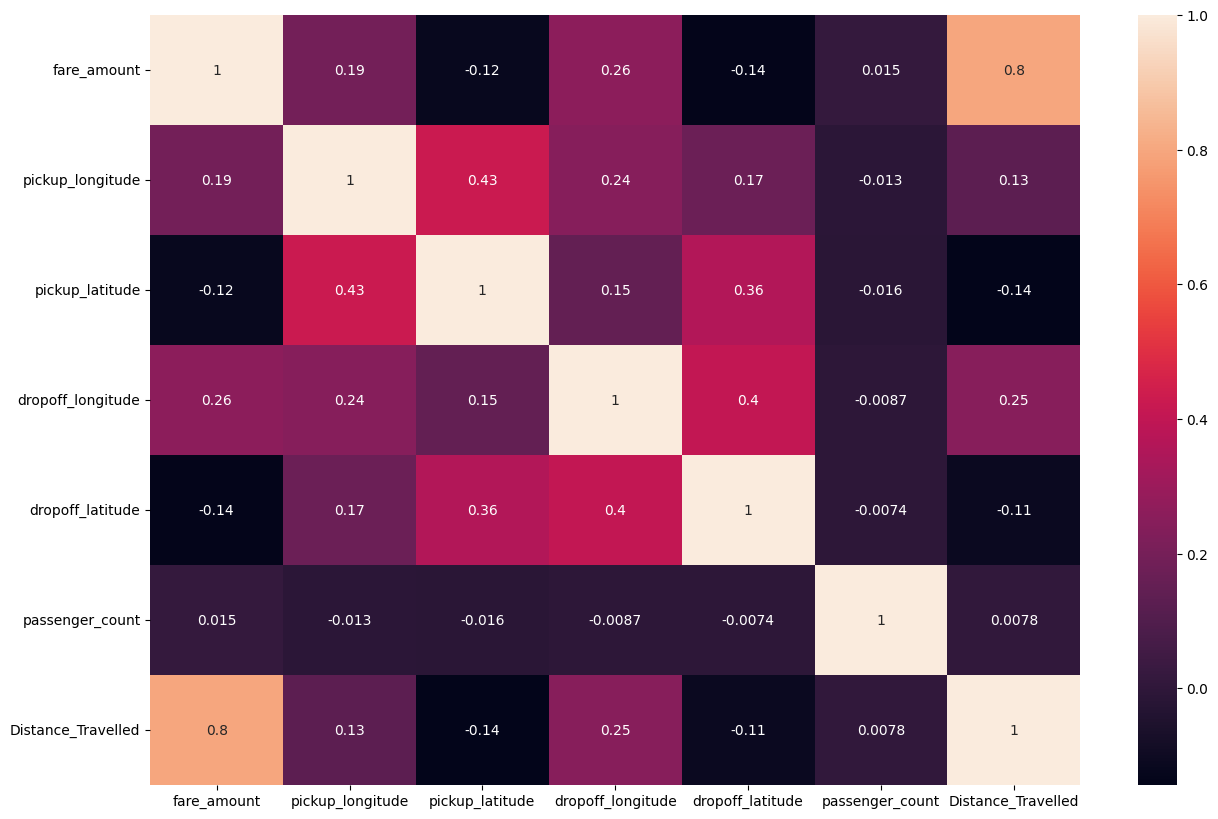

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)  #light color --> strongly correlated

### Diving the dataset into feature and target variables.

In [45]:
df.drop(['Distance_Travelled'], axis=1, inplace=True)

C:\Users\akank\AppData\Local\Temp\ipykernel_32428\169107375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Distance_Travelled'], axis=1, inplace=True)


In [46]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [47]:
#split x and y
x=df[df.columns[1:]]
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1.0
1,-73.994355,40.728225,-73.994710,40.750325,1.0
2,-74.005043,40.740770,-73.962565,40.772647,1.0
3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,-73.929786,40.744085,-73.973082,40.761247,3.5
...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1.0
199996,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,-73.986017,40.756487,-73.922034,40.692588,2.0
199998,-73.997124,40.725452,-73.983215,40.695415,1.0


In [48]:
y=df['fare_amount']
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199994    12.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 163040, dtype: float64

#### Splitting the data into training and testing data.

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((81520, 5), (81520, 5), (81520,), (81520,))

In [51]:
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8942,-73.929786,40.774035,-73.922034,40.749320,3.5
130526,-73.974129,40.759460,-73.952568,40.780563,1.0
77631,-73.989826,40.723401,-73.966795,40.767361,1.0
29000,-73.991164,40.742154,-73.992745,40.753419,1.0
30353,-73.994907,40.755352,-73.996337,40.736880,2.0
...,...,...,...,...,...
152889,-73.929786,40.769046,-73.967609,40.787766,2.0
179641,-73.974516,40.793341,-73.969207,40.803435,1.0
19296,-73.977587,40.752107,-73.989152,40.776840,3.5
58463,-73.969037,40.761733,-73.981260,40.733038,3.5


In [52]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
81383,-73.980721,40.744717,-73.995926,40.768787,1.0
84192,-73.982929,40.767467,-73.922034,40.682556,1.0
180020,-73.982419,40.764748,-73.942919,40.768723,2.0
133299,-74.005148,40.719137,-73.980457,40.728670,1.0
55105,-74.003662,40.720507,-73.991355,40.727612,1.0
...,...,...,...,...,...
54110,-74.001324,40.725373,-73.989998,40.767356,1.0
193703,-74.004223,40.738176,-73.952616,40.786289,1.0
5952,-73.929786,40.686252,-73.997702,40.738665,1.0
112293,-73.994710,40.740643,-74.006815,40.751242,1.0


In [53]:
y_train

8942      10.90
130526     9.00
77631     12.20
29000      7.30
30353      8.90
          ...  
152889    22.25
179641     4.10
19296     10.50
58463     18.90
123055     6.10
Name: fare_amount, Length: 81520, dtype: float64

In [54]:
y_test

81383     17.50
84192     22.25
180020    16.90
133299    11.00
55105     12.00
          ...  
54110     10.50
193703    16.10
5952      22.25
112293     8.10
183027     8.50
Name: fare_amount, Length: 81520, dtype: float64

### Linear Regression
1. 
Model training & testing dat
2. 
fitting the mod
3. l
predict the la
4. el
evaluate the model(check the accuracy)

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [56]:
model.fit(x_train, y_train)

LinearRegression()

In [57]:
y_preds=model.predict(x_test)
y_preds

array([ 8.76363888, 17.6744207 , 12.219113  , ..., 15.58060977,
        7.98589041,  9.44877308])

In [58]:
comparison = pd.DataFrame({'Actual label':y_test,'Predicted_label':y_preds})

In [59]:
comparison

,Actual label,Predicted_label
81383,17.50,8.763639
84192,22.25,17.674421
180020,16.90,12.219113
133299,11.00,11.349295
55105,12.00,10.564147
...,...,...
54110,10.50,8.770692
193703,16.10,10.191766
5952,22.25,15.580610
112293,8.10,7.985890


In [60]:
comparison.reset_index()

,index,Actual label,Predicted_label
0,81383,17.50,8.763639
1,84192,22.25,17.674421
2,180020,16.90,12.219113
3,133299,11.00,11.349295
4,55105,12.00,10.564147
...,...,...,...
81515,54110,10.50,8.770692
81516,193703,16.10,10.191766
81517,5952,22.25,15.580610
81518,112293,8.10,7.985890


In [61]:
comparison.reset_index().drop(['index'], axis=1)

,Actual label,Predicted_label
0,17.50,8.763639
1,22.25,17.674421
2,16.90,12.219113
3,11.00,11.349295
4,12.00,10.564147
...,...,...
81515,10.50,8.770692
81516,16.10,10.191766
81517,22.25,15.580610
81518,8.10,7.985890


<Axes: >

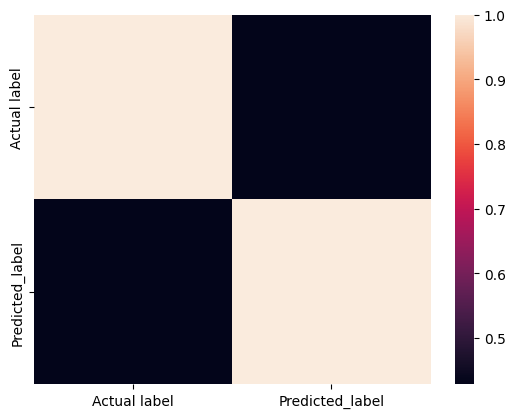

In [62]:
sns.heatmap(comparison.corr())

In [63]:
#evaluation

model.score(x_test, y_test)

0.1837207219041005

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, x, y)
cross_val_scores

array([0.18474364, 0.1806217 , 0.18747906, 0.18197594, 0.18809406])

In [65]:
#metrics evaluation using r2, mean squared error, root mean squared error

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.1837207219041005

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds)

23.26094751732885

In [68]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_preds)

4.822960451561764

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

3.8525124706811464

### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()

In [72]:
model2.fit(x_train, y_train)

RandomForestRegressor()

In [73]:
model2.score(x_test, y_test)

0.7855541562538724

In [74]:
y_preds2 = model2.predict(x_test)
y_preds2

array([12.361 , 22.199 , 14.3185, ..., 21.2275,  7.572 ,  8.141 ])

In [75]:
comparison2 = pd.DataFrame({'Actual label':y_test,'Predicted label':y_preds2})
comparison2

,Actual label,Predicted label
81383,17.50,12.3610
84192,22.25,22.1990
180020,16.90,14.3185
133299,11.00,11.3750
55105,12.00,7.3340
...,...,...
54110,10.50,14.2350
193703,16.10,17.4300
5952,22.25,21.2275
112293,8.10,7.5720


In [76]:
comparison2.reset_index()

,index,Actual label,Predicted label
0,81383,17.50,12.3610
1,84192,22.25,22.1990
2,180020,16.90,14.3185
3,133299,11.00,11.3750
4,55105,12.00,7.3340
...,...,...,...
81515,54110,10.50,14.2350
81516,193703,16.10,17.4300
81517,5952,22.25,21.2275
81518,112293,8.10,7.5720


In [77]:
comparison2.reset_index().drop(['index'], axis=1)

,Actual label,Predicted label
0,17.50,12.3610
1,22.25,22.1990
2,16.90,14.3185
3,11.00,11.3750
4,12.00,7.3340
...,...,...
81515,10.50,14.2350
81516,16.10,17.4300
81517,22.25,21.2275
81518,8.10,7.5720


In [78]:
r2_score(y_test, y_preds2)

0.7855541562538724

In [86]:
mean_squared_error(y_test, y_preds2)

6.110915284195105

In [87]:
root_mean_squared_error(y_test, y_preds2)

2.4720265541039614

In [88]:
mean_absolute_error(y_test, y_preds2)

1.6721391530026712

In [89]:
import pickle

In [90]:
pickle.dump(model2, open("random_forest_regressor_model.pkl","wb"))

In [91]:
fr=pickle.load(open("random_forest_regressor_model.pkl","rb"))
fr.score(x_test, y_test)

0.7855541562538724